In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_palette(sns.color_palette("viridis"))
sns.set_theme(style="dark")
sns.set(rc={'figure.figsize':(10, 10)})

# Simulation

Constants
```
Rc = 0.5
v = 0.03
```

Tuples

```
(N, L) = [(40, 3), (100, 5), (400, 10), (4000, 32), (10000, 50)]
```


In [2]:
df = pd.read_pickle('../TP2/data/simulation_runs.pkl')
df.head(1000)

,N,noise,run,t,va
0,40,0.0,0,0.0,0.077907
1,40,0.0,0,1.0,0.233412
2,40,0.0,0,2.0,0.327263
3,40,0.0,0,3.0,0.385974
4,40,0.0,0,4.0,0.409819
...,...,...,...,...,...
995,40,0.0,0,995.0,1.000000
996,40,0.0,0,996.0,1.000000
997,40,0.0,0,997.0,1.000000
998,40,0.0,0,998.0,1.000000


In [3]:
# calcular la media y la desviación estándar de "va" para cada combinación única de N y ruido
grouped_df = df.groupby(['N', 'noise']).agg({'va': ['mean', 'std']})

# reiniciar el índice para hacer que las columnas "N" y "noise" se conviertan en columnas ordinarias
grouped_df = grouped_df.reset_index()

# renombrar las columnas para que coincidan con los nombres esperados por Seaborn
grouped_df.columns = ['N', 'noise', 'va_mean', 'va_std']

grouped_df['noise'] = grouped_df['noise'].astype(int) 

grouped_df = grouped_df.rename(columns={'noise': 'ruido'})

grouped_df

,N,ruido,va_mean,va_std
0,40,0,0.975595,0.105989
1,40,1,0.914031,0.092491
2,40,2,0.725494,0.124686
3,40,3,0.478426,0.144221
4,40,4,0.244318,0.112913
5,40,5,0.155489,0.080076
6,100,0,0.940883,0.160602
7,100,1,0.869711,0.103885
8,100,2,0.613902,0.164986
9,100,3,0.354512,0.139847


Text(0, 0.5, 'va promedio')

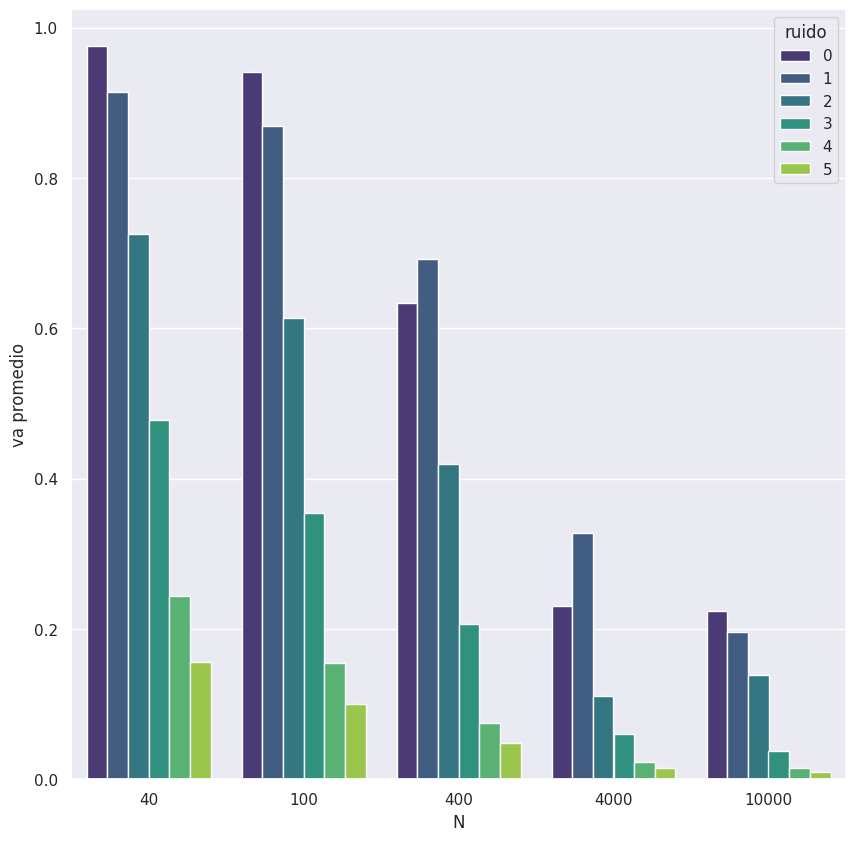

In [4]:
# crear el gráfico de barras con barras de error
plot = sns.barplot(x='N', y='va_mean', hue='ruido', data=grouped_df, palette=sns.color_palette("viridis"))
plot.set_ylabel('va promedio')

In [5]:
df, df.shape

(          N  noise  run       t        va
 0        40    0.0    0     0.0  0.077907
 1        40    0.0    0     1.0  0.233412
 2        40    0.0    0     2.0  0.327263
 3        40    0.0    0     3.0  0.385974
 4        40    0.0    0     4.0  0.409819
 ...     ...    ...  ...     ...       ...
 2998  10000    5.0    2   996.0  0.007782
 2999  10000    5.0    2   997.0  0.010584
 3000  10000    5.0    2   998.0  0.016918
 3001  10000    5.0    2   999.0  0.008281
 3002  10000    5.0    2  1000.0  0.013669
 
 [90090 rows x 5 columns],
 (90090, 5))

In [6]:
# Suponiendo que tu DataFrame original se llama df, puedes crear un nuevo DataFrame con los valores medios y std de va de la siguiente manera:
grouped_df = df.groupby(['N', 'noise', 't']).agg({'va': ['mean', 'min', 'max']}).reset_index()

# Renombramos las columnas del nuevo DataFrame
grouped_df.columns = ['N', 'noise', 't', 'va_mean', 'va_min', 'va_max']

grouped_df = grouped_df.rename(columns={'noise': 'ruido'})

grouped_df, grouped_df.shape

(           N  ruido       t   va_mean    va_min    va_max
 0         40    0.0     0.0  0.083669  0.076733  0.096366
 1         40    0.0     1.0  0.193150  0.099707  0.246331
 2         40    0.0     2.0  0.243237  0.124921  0.327263
 3         40    0.0     3.0  0.289597  0.187266  0.385974
 4         40    0.0     4.0  0.325252  0.239345  0.409819
 ...      ...    ...     ...       ...       ...       ...
 30025  10000    5.0   996.0  0.005844  0.001615  0.008134
 30026  10000    5.0   997.0  0.008623  0.006199  0.010584
 30027  10000    5.0   998.0  0.011553  0.007623  0.016918
 30028  10000    5.0   999.0  0.007508  0.005769  0.008474
 30029  10000    5.0  1000.0  0.011035  0.006286  0.013669
 
 [30030 rows x 6 columns],
 (30030, 6))

Text(0, 0.5, 'va promedio')

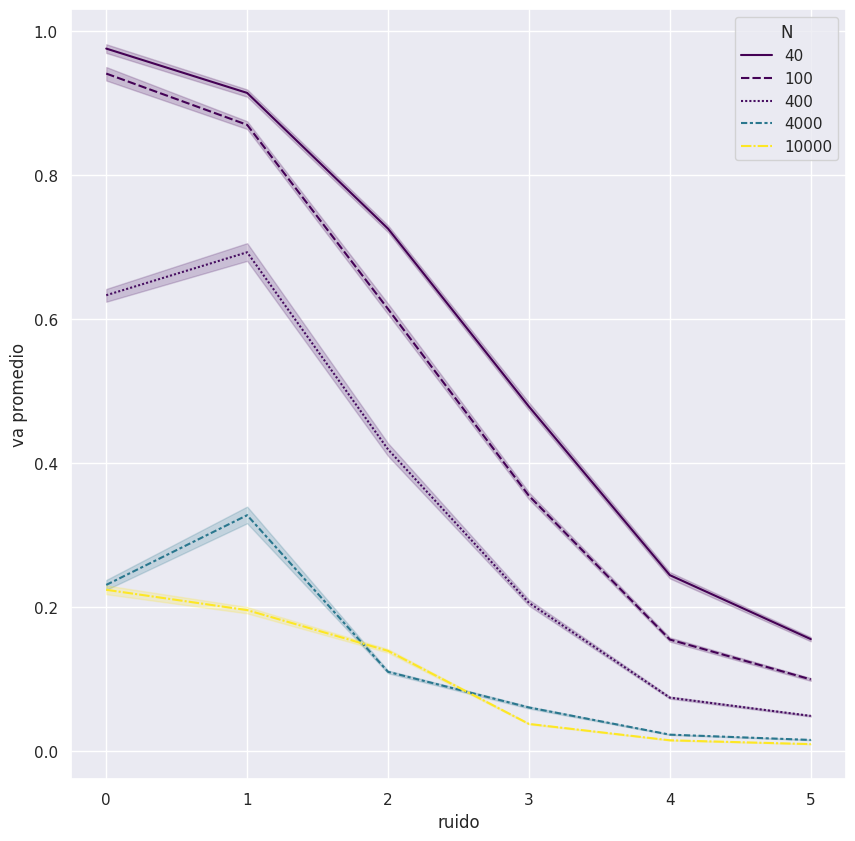

In [7]:
plot = sns.lineplot(x='ruido', y='va_mean', hue='N', data=grouped_df, style='N', palette='viridis')
plot.set_ylabel('va promedio')

In [8]:
df_400 = grouped_df.loc[grouped_df['N'] == 400]
df_400 = df_400.drop('N', axis=1)
df_400, df_400.shape

(       ruido       t   va_mean    va_min    va_max
 12012    0.0     0.0  0.042276  0.023596  0.067858
 12013    0.0     1.0  0.076479  0.033197  0.118519
 12014    0.0     2.0  0.107056  0.058423  0.153802
 12015    0.0     3.0  0.118484  0.065681  0.176984
 12016    0.0     4.0  0.126333  0.069747  0.197331
 ...      ...     ...       ...       ...       ...
 18013    5.0   996.0  0.021192  0.019634  0.022018
 18014    5.0   997.0  0.059605  0.047614  0.071604
 18015    5.0   998.0  0.083689  0.028428  0.136714
 18016    5.0   999.0  0.070640  0.051905  0.094555
 18017    5.0  1000.0  0.045199  0.032919  0.053110
 
 [6006 rows x 5 columns],
 (6006, 5))

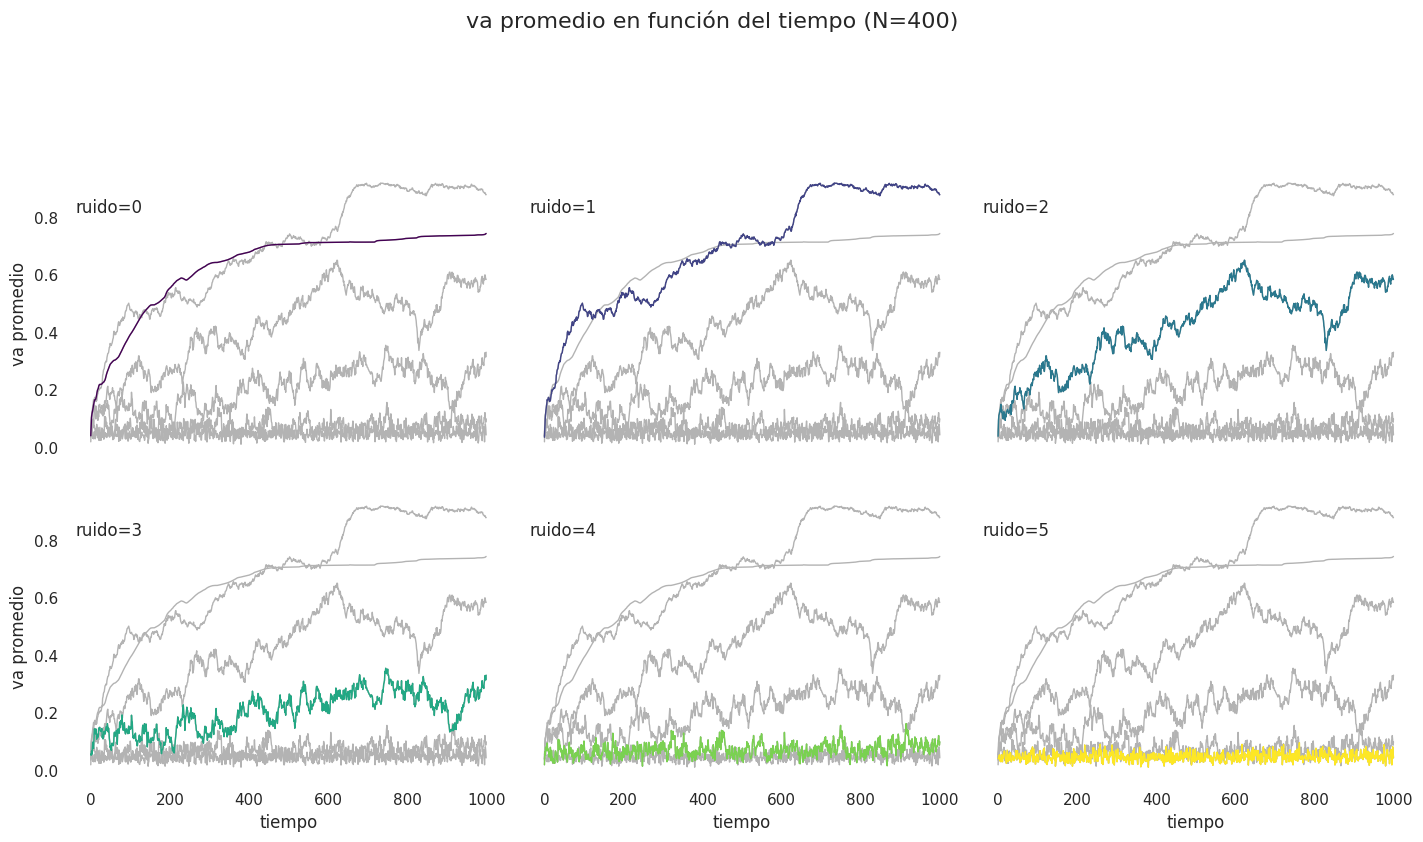

In [10]:
# Plot each noise's time series in its own facet
g = sns.relplot(
    data=df_400,
    x="t", y="va_mean", col="ruido", hue="ruido",
    kind="line", palette="viridis", linewidth=1, zorder=5,
    col_wrap=3, height=4, aspect=1.2, legend=False,
    err_kws={'capsize':3, 'elinewidth':1, 'capthick':1}
)

# Iterate over each subplot to customize further
for noise, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.01, .85, f"ruido={int(noise)}", transform=ax.transAxes, fontweight="regular")

    # Plot every noise's time series in the background
    sns.lineplot(
        data=df_400, x="t", y="va_mean", units='ruido',
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

for ax in g.axes.flat:
    ax.set_frame_on(False)

# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("tiempo", "va promedio")
plt.suptitle('va promedio en función del tiempo (N=400)', y=1.05, fontsize=16)
plt.subplots_adjust(top=0.85)
plt.show()